<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/MicroscopyGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[MicroscopyGPT: Generating Atomic-Structure Captions from Microscopy Images of 2D Materials with Vision-Language Transformers](https://doi.org/10.26434/chemrxiv-2025-gblz7)

Author email: kamal.choudhary@nist.gov



In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:09
🔁 Restarting kernel...


In [1]:
%%time
import os
os.chdir('/content')
!rm -rf Software
os.makedirs('/content/Software')
os.chdir('/content/Software')
!pip install uv
if not os.path.exists('atomgpt'):
  !rm -rf atomgpt
  !git clone https://github.com/usnistgov/atomgpt.git
  os.chdir('atomgpt')
  !uv pip install -q -e .



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 122.1 MB/s eta 0:00:00
Cloning into 'atomgpt'...
remote: Enumerating objects: 1316, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 1316 (delta 79), reused 84 (delta 45), pack-reused 1135 (from 1)
Receiving objects: 100% (1316/1316), 67.13 MiB | 28.33 MiB/s, done.
Resolving deltas: 100% (749/749), done.
CPU times: user 292 ms, sys: 54.5 ms, total: 347 ms
Wall time: 59.9 s


In [2]:
# Check imports
import atomgpt
import os
os.environ.pop('MPLBACKEND', None)  # Remove the invalid backend
import matplotlib
matplotlib.use('Agg')  # Use a compatible backend
import matplotlib.pyplot as plt



Pretrained model inference

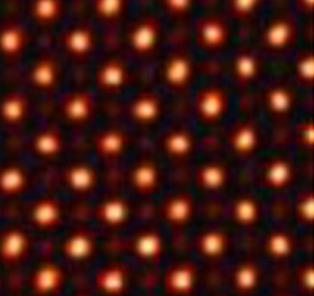

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
#Input Image of FeTe from: https://www.nature.com/articles/s41467-020-17253-x
Image('atomgpt/examples/inverse_model_vision/FeTe.png')

In [5]:
%%time
!python atomgpt/inverse_models/inverse_vision_predict.py --image_path atomgpt/examples/inverse_model_vision/FeTe.png --formula FeTe

AtomGPT 2025.5.7: Fast Mllama patching. Transformers: 4.51.3.
Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
Torch: 2.7.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.3.0
Bfloat16 = FALSE. FA [Xformers = 0.0.30. FA2 = False]

model.safetensors.index.json: 100% 375k/375k [00:00<00:00, 22.1MB/s]
Fetching 2 files:   0% 0/2 [00:00<?, ?it/s]
model-00001-of-00002.safetensors:   0% 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0% 0.00/2.94G [00:00<?, ?B/s]
model-00001-of-00002.safetensors:   0% 320k/4.97G [00:00<3:57:30, 349kB/s]
model-00001-of-00002.safetensors:   0% 2.30M/4.97G [00:01<28:07, 2.94MB/s]

model-00002-of-00002.safetensors:   0% 235k/2.94G [00:01<3:31:43, 231kB/s]
model-00001-of-00002.safetensors:   0% 9.32M/4.97G [00:01<06:36, 12.5MB/s]
model-00001-of-00002.safetensors:   1% 33.3M/4.97G [00:02<05:57, 13.8MB/s]
model-00001-of-00002.safetensors:   1% 46.8M/4.97G [00:04<06:54, 11.9MB/s]
model-00001-of-00002.safetensors:   2% 114M/4.97G [00:05<

The model generates atomic structure in the POSCAR format as shown above

Training example. Note you might have to restart session because of limited memory on colab.

In [ ]:
%%time
!python atomgpt/inverse_models/inverse_vision.py --max_samples 10

In [7]:
!pip freeze

accelerate==1.7.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.18
aiosignal==1.3.2
annotated-types==0.7.0
archspec @ file:///home/conda/feedstock_root/build_artifacts/archspec_1708969572489/work
ase==3.25.0
async-timeout==5.0.1
-e git+https://github.com/usnistgov/atomgpt.git@d9f35797c9a666a82efbdc8b3b58af3c78325030#egg=atomgpt
attrs==25.3.0
bitsandbytes==0.45.5
black==25.1.0
boltons @ file:///home/conda/feedstock_root/build_artifacts/boltons_1733827268945/work
Brotli @ file:///home/conda/feedstock_root/build_artifacts/brotli-split_1725267488082/work
certifi==2025.4.26
cffi @ file:///home/conda/feedstock_root/build_artifacts/cffi_1725560564262/work
charset-normalizer==3.4.2
click==8.2.1
colorama @ file:///home/conda/feedstock_root/build_artifacts/colorama_1733218098505/work
conda @ file:///home/conda/feedstock_root/build_artifacts/conda_1735996947529/work
conda-libmamba-solver @ file:///home/conda/feedstock_root/build_artifacts/conda-libmamba-solver_1727359833193/work/src
conda-package-handlin